# EDA of Califronia's Climate Registry Information System

<img style="float: right;margin:5px 20px 5px 1px; max-width:100px" src="./Images/CalEPAlogo.png" >
California Environmental Protection Agency accounts for Greenhouse Gas emissions throughout the state. It uses the web-based Climate Registry Information System tool to calulate the Carbon Dioxide Equivalent. Agencies have the option to either aggergate their data or submit individual portions. In this Exploratory Data Analysis we are going to look at the different sources and the trends of which CO2e is produced.

This is a work in progress.`

### Imports:

In [1]:
import os
import numpy as np2
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

### The Dataset:
The dataset is taken from: https://catalog.data.gov/dataset/state-agency-co2e-e54e9

It is a representation of the years 2010-2016 (inclusive). Let's start with looking at the raw data given and the data dictionary.

In [2]:
file_path = 'csv_file/'
california_co2e = pd.read_csv(file_path + 'ca-agencies-ghg-dataset-2010-2016.csv',engine='python')
california_co2e.head()

,Agency_Name,Emission_Year,Facility_Name,Source_Name,Activity_Type,Fuel_Type,Fuel,End_Use_Sector,Technology,Fuel_Quantity,Fuel_Quantity_Units,Mobile_Fuel_Quantity,Mobile_Fuel_Quantity_Units,CO2e_Metric_Tons
0,California African American Museum,2010,Building,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,740160.000,kWh,0.0,NaN,221.13951
1,California African American Museum,2010,Building,Natural Gas,Stationary Combustion - Scope 1,Natural Gas,Unspecified (Weighted U.S. Average),Commercial,Unspecified Technology,4916.000,therm,0.0,NaN,26.06463
2,California African American Museum,2010,Vehicle Fleet,Honda,Mobile Combustion - Scope 1,Motor Gasoline,All,Gasoline Passenger Cars,Cars (Model Year 2005),351.000,gal,6089.0,mi,3.08178
3,California African American Museum,2010,Vehicle Fleet,Van,Mobile Combustion - Scope 1,Motor Gasoline,All,"Gasoline Light Trucks (Vans, Pickup Trucks, SUVs)","Vans, Pickup Trucks, SUVs (Model Year 2003)",93.232,gal,2239.0,mi,0.81858
4,California African American Museum,2011,Building,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,758040.000,kWh,0.0,NaN,226.48156


### Data Dictionary
The Data Dictionary below is taken from the official 2014 Data Dictionary. Not all Fields are the same and some are missing. A 2016 Data Dictionary could not be found. Green House Gas will be be referred as GHG.
* **Agency_Name :** Name of State Agency, also known as the Entity.
* **Emission_Year :** Year of GHG emissions
* **Facility_Name :** Name of a facility for each agency. Agencies can choose to separate their statewide operations into multiple facilities in CRIS, or pool them into a single facility at the entity-level 
* **Source_Name :** This is the name of a source of emissions within each facility. Examples include vehicles, natural gas, and electricity.
* **Activity_Type :** This is the category of activity which releases greenhouse gas emissions. There are three category types: Scope 1 (direct emissions), Scope 2 (indirect Emissions), and Biogenic (stationary or mobile combustion of biomass sources). Stationary sources are not movable in operation, such as boilers, furnaces, and emergency generators. Mobile combustion includes vehicles and anything which can move while in operation. Purchased electricity falls under Scope 2, indirect emissions. 
* **Fuel_Type :** The fuel type refers to the type of fuel that the source uses. For purchased electricity, the fuel type will be WECC California, which is the name of the regional electric grid. This information is selected by the state agency to determine the correct emission factor for CO2. 
* **Fuel :** This is more specific information, if applicable, about a fuel type. If there is no more specific information, the default value will be All. This information is selected by the state agency to determine the correct emission factor for CO2.
* **End_Use_Sector :** For non-electricity sources, this indicates the sector that a specific source belongs to. For vehicles, it indicates the vehicle type. For stationary sources, it indicates what industry sector (commercial, industrial, residential, electric power) the source belongs to. This information is selected by the state agency to determine the correct emission factor for CH4 and N2O.
* **Technology :** Depending upon the end use sector, technology refers to the emissions control, model year, or other technology, usually of combustion sources. Purchased electricity will have an unspecified technology as a default value. This information is selected by the state agency to determine the correct emission factor for CH4 and N2O.
* **Fuel_Quantity :** NA
* **Fuel_Quantity_Units :** NA
* **Mobile_Fuel_Quantity :** NA
* **Mobile_Fuel_Quantity_Units :** NA
* **CO2e_Metric_Tons :** This is the number, in metric tons, of carbon dioxide equivalent that each source emits annually. Carbon Dioxide equivalent is determined by adding up emissions of CO2, CH4, and N2O for each source, multiplying each source by its global warming potential (GWP) and summing these emissions into a single number. 

### Our First Look
Let's start exploring the data by looking at data types, missing data and summary statistics. 

In [3]:
display(california_co2e.info())
display(california_co2e.describe())
for col in california_co2e.columns:
    display('There are ' + str(california_co2e[col].nunique()) + 
            ' unique entries in the ' + str(col) + ' column')
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 14 columns):
Agency_Name                   10917 non-null object
Emission_Year                 10917 non-null int64
Facility_Name                 10917 non-null object
Source_Name                   10917 non-null object
Activity_Type                 10917 non-null object
Fuel_Type                     10724 non-null object
Fuel                          10724 non-null object
End_Use_Sector                10917 non-null object
Technology                    10917 non-null object
Fuel_Quantity                 10494 non-null float64
Fuel_Quantity_Units           10843 non-null object
Mobile_Fuel_Quantity          10845 non-null float64
Mobile_Fuel_Quantity_Units    2192 non-null object
CO2e_Metric_Tons              10568 non-null float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


None

,Emission_Year,Fuel_Quantity,Mobile_Fuel_Quantity,CO2e_Metric_Tons
count,10917.000000,1.049400e+04,1.084500e+04,1.056800e+04
mean,2013.661629,6.164358e+06,1.429822e+05,1.692429e+03
std,2.018421,2.688140e+08,3.181972e+06,2.676186e+04
min,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012.000000,2.659750e+03,0.000000e+00,5.706202e+00
50%,2014.000000,3.599428e+04,0.000000e+00,3.304822e+01
75%,2015.000000,2.626140e+05,0.000000e+00,1.880655e+02
max,2016.000000,2.008479e+10,1.408489e+08,1.025543e+06


'There are 42 unique entries in the Agency_Name column'

'There are 7 unique entries in the Emission_Year column'

'There are 1113 unique entries in the Facility_Name column'

'There are 545 unique entries in the Source_Name column'

'There are 15 unique entries in the Activity_Type column'

'There are 23 unique entries in the Fuel_Type column'

'There are 35 unique entries in the Fuel column'

'There are 26 unique entries in the End_Use_Sector column'

'There are 85 unique entries in the Technology column'

'There are 7378 unique entries in the Fuel_Quantity column'

'There are 12 unique entries in the Fuel_Quantity_Units column'

'There are 872 unique entries in the Mobile_Fuel_Quantity column'

'There are 6 unique entries in the Mobile_Fuel_Quantity_Units column'

'There are 8470 unique entries in the CO2e_Metric_Tons column'

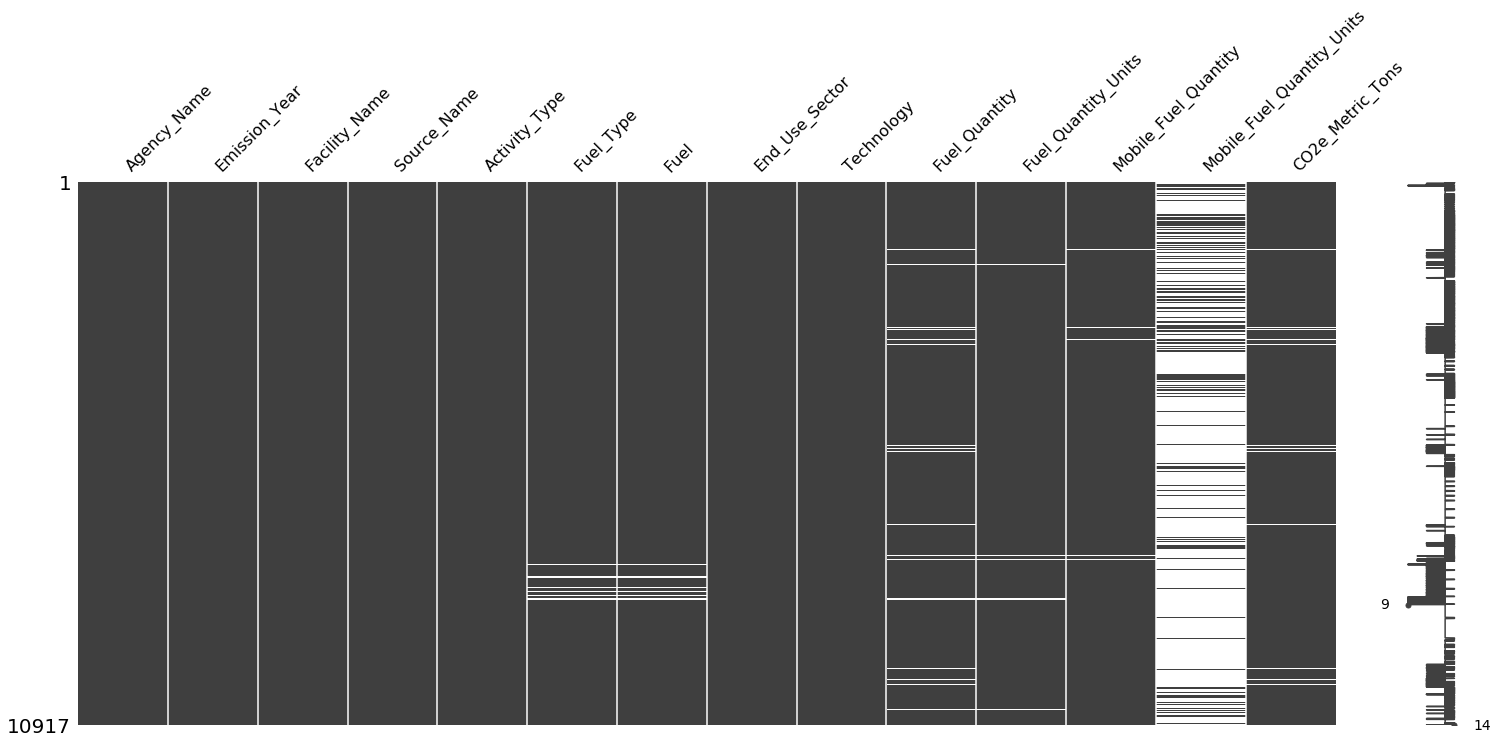

In [4]:
msno.matrix(california_co2e)

#### Observations:
- Most fields don't have null values.
- `Mobile_Fuel_Quantity_Units` is the only exception, however from the data dictionary, it can be possible that it's a new column. Which means the last three years and their entries are the only ones that have this data. 

### Three Types of Scopes
The data dictionary states that there are three types of scopes in the ` activity_type ` column, but we can see that there are actually 15 unique entries. We can add a new column that specifies the scope and visualize the results.

In [5]:
scopes = []
for row in california_co2e['Activity_Type']:
    if 'Scope 1' in row:
        scopes.append('Scope 1')
    elif 'Scope 2' in row:
        scopes.append('Scope 2')
    scopes.append('Scope 3')
california_co2e['Scopes'] = pd.Series(scopes)
scopes = california_co2e[['Scopes', 'CO2e_Metric_Tons']].groupby('Scopes', as_index=False).sum()
scopes['CO2e_Metric_Tons'] = scopes['CO2e_Metric_Tons'].astype('int64')


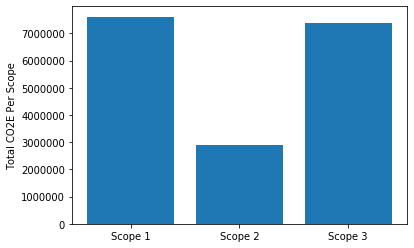

In [6]:
plt.bar(scopes['Scopes'], scopes['CO2e_Metric_Tons'])
plt.ylabel('Total CO2E Per Scope')
plt.show()

#### Observations:
- Most of the CO2e came from Scope 1 which means they are from direct emissions.
- The second most came from Scope 3 which can use a little more explanation: ```Not all stationary combustion sources burn fossil fuels. Biomass (non-fossil) fuels (e.g., forestry-derived, agriculture-derived, biomass-derived gases) may be combusted in stationary sources independently or co-fired with fossil fuels... The GHG Protocol requires that CO2 emissions from biomass combustion at stationary sources are reported as biomass CO2 emissions (in terms of total amount of biogenic CO2 emitted) and are tracked separately from fossil CO2 emissions. Biomass CO2 emissions are not included in the overall CO2-equivalent emissions inventory for organizations following this guidance. CH4 and N2O emissions from biomass are included in the overall CO2-equivalent emissions inventory.Recently, there has been increased scientific inquiry into accounting for biomass in energy production. The EPA’s Science Advisory Board recently found that “there are circumstances in which biomass is grown, harvested and combusted in a carbon neutral fashion but carbon neutrality may not an appropriate assumption; it is a conclusion that should be reached only after considering a particular feedstock’s production and consumption cycle. There is considerable heterogeneity in feedstock types, sources and production methods and thus net biogenic carbon emissions will vary considerably.”``` Taken from: Greenhouse Gas Inventory GuidanceDirect Emissions from Stationary Combustion Sources, https://www.epa.gov/sites/production/files/2016-03/documents/stationaryemissions_3_2016.pdf

### Granular Details
Now that we have a overall view of our scopes, we can go back and look at the finer details in the `Activity_Type` column.

In [7]:
activities_scopes = california_co2e[['Activity_Type', 'CO2e_Metric_Tons']].groupby('Activity_Type', as_index=False).sum()
activities_scopes['CO2e_Metric_Tons'] = activities_scopes['CO2e_Metric_Tons'].astype('int64')
activities_scopes

,Activity_Type,CO2e_Metric_Tons
0,Employee Commuting - Scope 3 (Optional),3334
1,Mobile Biomass Combustion - Biomass,65098
2,Mobile Combustion - Scope 1,1816068
3,Purchased Cooling - Scope 2,2
4,Purchased Electricity - Location Based - Scope 2,1676356
5,Purchased Electricity - Market Based - Biomass,45759
6,Purchased Electricity - Market Based - Scope 2,3372058
7,Purchased Electricity - Scope 2,5687146
8,Purchased Heating - Location Based - Scope 2,4041
9,Purchased Heating - Market Based - Scope 2,4055


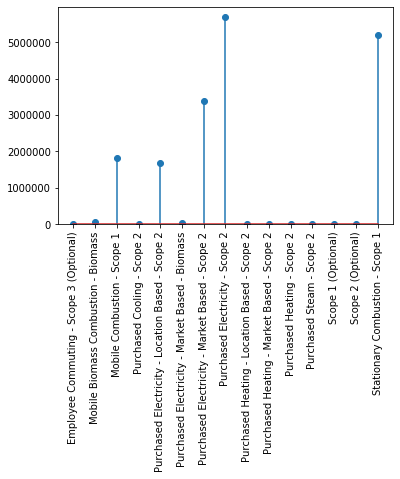

In [8]:
plt.stem(activities_scopes['Activity_Type'], activities_scopes['CO2e_Metric_Tons'], use_line_collection=True)
plt.xticks(rotation=90, ha='center')
plt.ylim(0, None)
plt.rcParams['figure.figsize'] = [20, 10]


#### Observations:
- Although Scope 2 came in last in the aggeragted data, the highest producer for the 15 in the subset of categories has a Scope 2 CO2e producer as first.
- A close second is a Scope 1 producer. 
- The majority of the categories did not produce more than 6,000 CO2e Tons.
- Outliers: `Scope 1 (Optional)`, `Scope 2 (Optional)`,  `Purchased Heating - Scope 2`, and `Purchased Cooling - Scope 2`, all had significantly lower than the rest of the categories.
- Questions that come to mind: 
    - What purpose do the "Optional" categories hold
    - If Agencies are allowed to give aggergatted data, then how many of these categories are over accounted for or under accounted for?
    - Database suggest: add a column where the agency can declare if their data is aggergated.

### Co2E Per Year
Next we are going to look at the yearly aggergated CO2e and explore NaN and Zero entries in the Co2e columns per year.

In [9]:
california_co2e['Emission_Year'].unique()
yearly_co2e = california_co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year', as_index=False).sum()
yearly_co2e

,Emission_Year,CO2e_Metric_Tons
0,2010,3.936998e+06
1,2011,2.974922e+06
2,2012,3.042338e+06
3,2013,2.220210e+06
4,2014,1.471384e+06
5,2015,1.990696e+06
6,2016,2.249042e+06


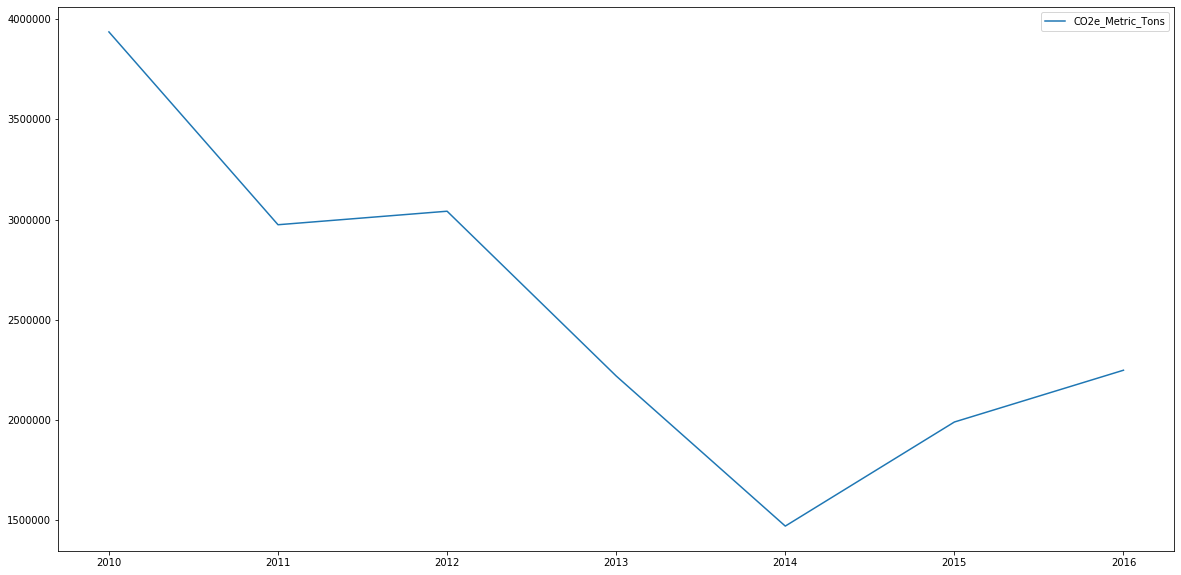

In [10]:
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=yearly_co2e)
plt.legend()

#### Observations:
- We can see a steady decrease of CO2e per year until 2015 where it starts to pick up again.

In [11]:
# Creating two new dataframes: One where the 'CO2e_Metric_Tons' entries are 0, and a second where they are 'Null'
zero_co2e = california_co2e[california_co2e['CO2e_Metric_Tons']==0]
nan_co2e = california_co2e[california_co2e['CO2e_Metric_Tons'].isnull()]
display(zero_co2e.info())
nan_co2e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 122 to 10908
Data columns (total 15 columns):
Agency_Name                   254 non-null object
Emission_Year                 254 non-null int64
Facility_Name                 254 non-null object
Source_Name                   254 non-null object
Activity_Type                 254 non-null object
Fuel_Type                     250 non-null object
Fuel                          250 non-null object
End_Use_Sector                254 non-null object
Technology                    254 non-null object
Fuel_Quantity                 248 non-null float64
Fuel_Quantity_Units           248 non-null object
Mobile_Fuel_Quantity          253 non-null float64
Mobile_Fuel_Quantity_Units    33 non-null object
CO2e_Metric_Tons              254 non-null float64
Scopes                        254 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 31.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 77 to 10148
Data columns (total 15 columns):
Agency_Name                   349 non-null object
Emission_Year                 349 non-null int64
Facility_Name                 349 non-null object
Source_Name                   349 non-null object
Activity_Type                 349 non-null object
Fuel_Type                     348 non-null object
Fuel                          348 non-null object
End_Use_Sector                349 non-null object
Technology                    349 non-null object
Fuel_Quantity                 0 non-null float64
Fuel_Quantity_Units           349 non-null object
Mobile_Fuel_Quantity          291 non-null float64
Mobile_Fuel_Quantity_Units    58 non-null object
CO2e_Metric_Tons              0 non-null float64
Scopes                        349 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 43.6+ KB


/home/albertulysses/anaconda3/envs/data_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


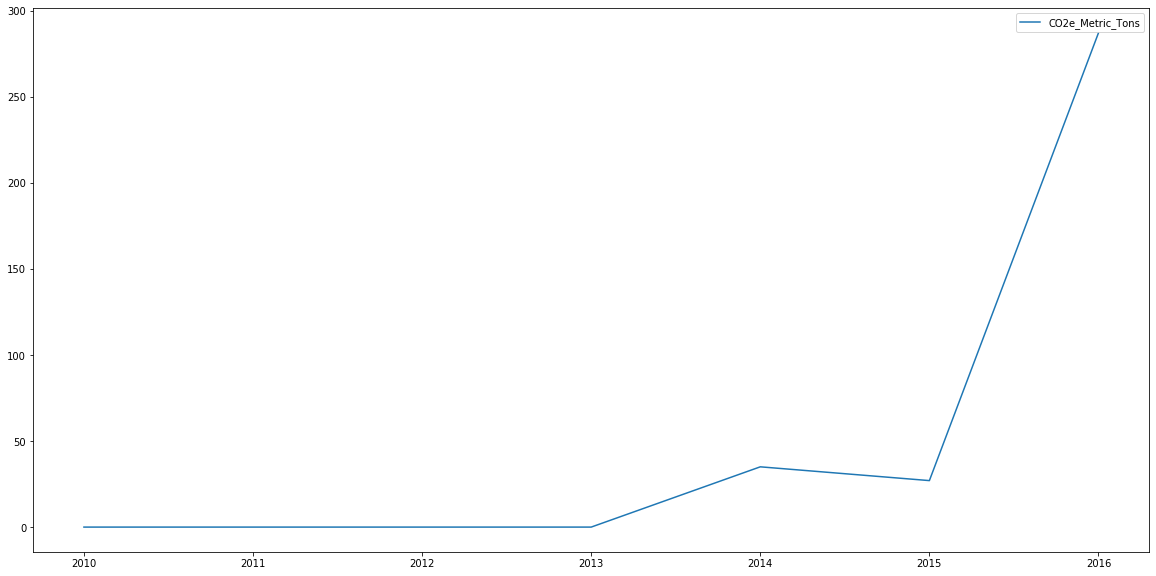

In [12]:
# Replacing nan with the word missing to count the number of times an entry is null.
nan_co2e.loc[:,'CO2e_Metric_Tons'] = 'missing'
nan_co2e_yearly = nan_co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year', as_index=False).count()

"""
In an earlier version I had noticed that Null Values were absent until 2014. 
To reflect the time series for all years in the dataset- 
I added the following columns that indicate no Nulls for those years.
""" 
# Include years without Nan options
years_with_no_nan = [
    pd.Series([2010, 0], index=nan_co2e_yearly.columns),
    pd.Series([2011, 0], index=nan_co2e_yearly.columns),
    pd.Series([2012, 0], index=nan_co2e_yearly.columns),
    pd.Series([2013, 0], index=nan_co2e_yearly.columns),
]

nan_co2e_yearly = nan_co2e_yearly.append(years_with_no_nan, ignore_index=True).sort_values('Emission_Year')
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=nan_co2e_yearly)
plt.legend()

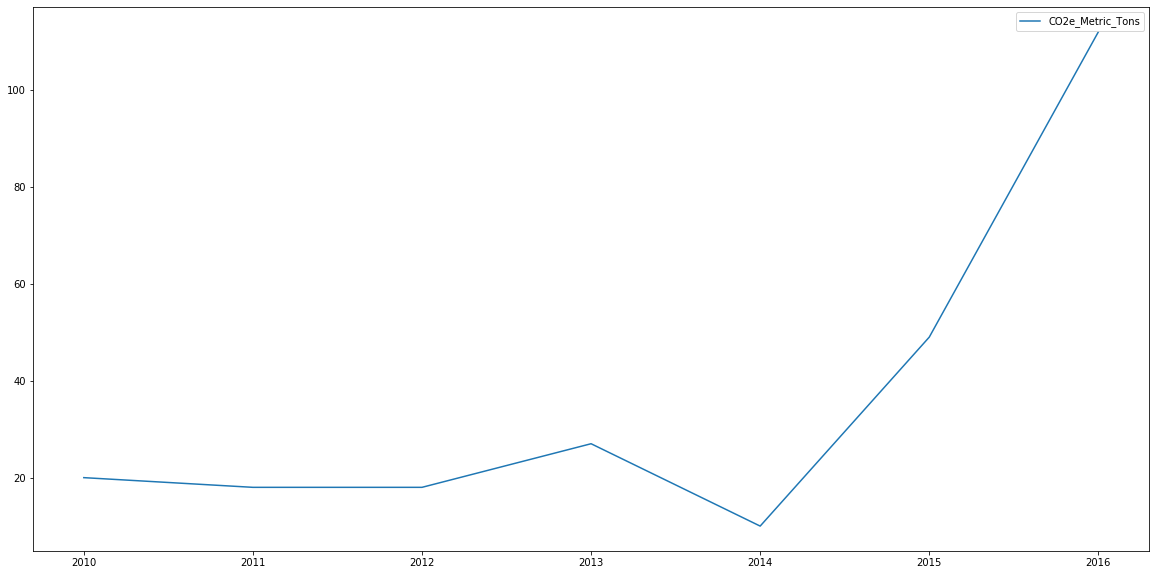

In [13]:
zero_co2e_yearly = zero_co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year', as_index=False).count()
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=zero_co2e_yearly)
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

#### Observations:
- We can see that Nulls did not start occuring until 2014
    - What does that mean for the prior years? Were zeros treated as nulls, was there no nulls or was there another way to account for them?
- The graphs are a little misleading, we can see that from 2015 to 2016 the number of NaN entries have increased, and that the number of Zeros have increased since 2014, but it doesn't tell us the percentage of the total, was there 500 entries in 2016 or 5000? I'll address this later.
- Both Zero entries and Null entries can be seen inclining.
- Zero inclining is a good thing as we are trying to lower our emissions.

### Visualizing all Entries
If we put all of the entries on one graph we have a better representation of what is happening with Co2e Metric Tons entries.

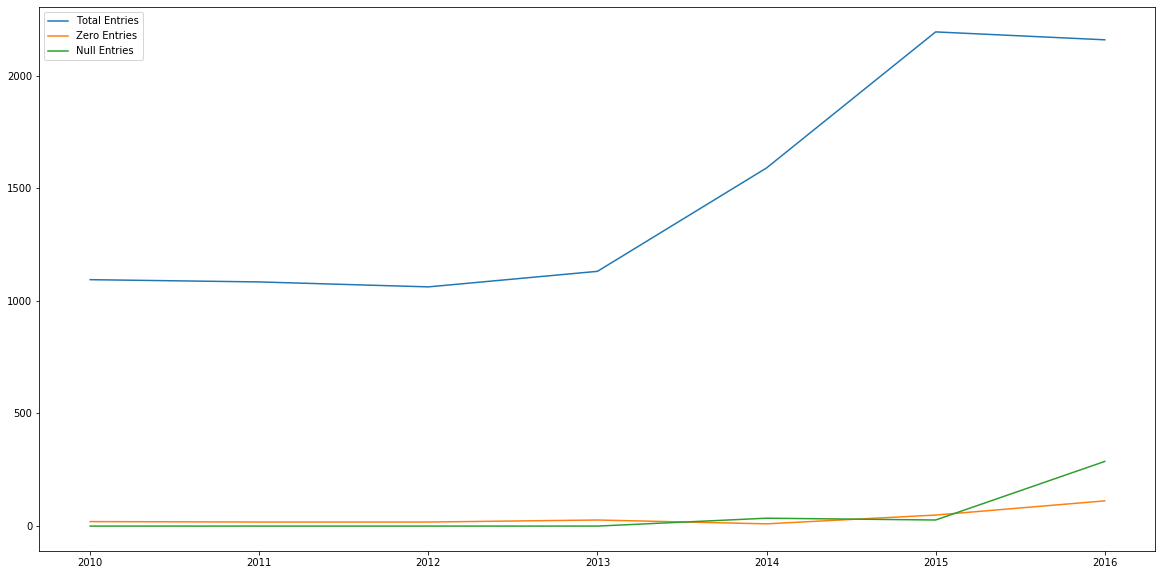

In [14]:
# Creating a dataframe for all entries that don't have Null or Zero entries for the 'Co2e_Metric_Tons' column.
co2e = california_co2e[california_co2e['CO2e_Metric_Tons']!=0]
co2e = co2e.dropna(axis=0, subset=['CO2e_Metric_Tons'])
co2e_yearly = co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year', as_index=False).count()
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=co2e_yearly, label='Total Entries')
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=zero_co2e_yearly, label='Zero Entries')
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=nan_co2e_yearly, label='Null Entries')
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

#### Observations:
- We see a slight correlation with a decrease of entries in 2015 and 2016 with the introduction of Null values, which makes sense if the same number of agencies are reporting.
- The zero entries are not increasing at a significant rate.
- There is a doubling of entries from 2010 until 2015, where 2014 to 2015 has the largest spike.

In [25]:
#TODO: expand on the EDA
#TODO: Go back and clean up graphs (add titles and keys to make it easier to read)

## Future Ideas:
Moving forward I would like to explore more fields and create more creative feature columns